This is an example of a HOA 7BA lattice.

The unit of angle is radian.

For multipoles, $k_n = \dfrac{q}{P_0} \dfrac{\partial^n B_y}{\partial x^n}$

`ssr.CSLattice(ele`

In [1]:
import simplestoragering as ssr
import numpy as np
import matplotlib.pyplot as plt


def generate_ring():
    d2r = np.pi / 180
    ssr.set_ref_energy(2200)
    D1 = ssr.Drift('D1', length=2.650000)
    D1A = ssr.Drift('D1A', length=2.475000)
    D1B = ssr.Drift('D1B', length=0.075000)
    D2 = ssr.Drift('D2', length=0.250000)
    D2A = ssr.Drift('D2A', length=0.075000)
    D2B = ssr.Drift('D2B', length=0.075000)
    D3 = ssr.Drift('D3', length=0.185000)
    D4 = ssr.Drift('D4', length=0.200000)
    D5 = ssr.Drift('D5', length=0.325000)
    D6 = ssr.Drift('D6', length=0.150000)
    D7 = ssr.Drift('D7', length=0.150000)
    D8 = ssr.Drift('D8', length=0.207000)
    D9 = ssr.Drift('D9', length=0.150000)

    Q1 = ssr.Quadrupole('Q1', length=0.220000, k1=5.818824)
    Q2 = ssr.Quadrupole('Q2', length=0.220000, k1=-6.088408)
    Q3 = ssr.Quadrupole('Q3', length=0.140000, k1=6.507626)

    B1 = ssr.HBend('B1', length=0.750000, theta=2.294735 * d2r, k1=0.000000, theta_in=1.147368 * d2r,
               theta_out=1.147368 * d2r)
    B2 = ssr.HBend('B2', length=0.890000, theta=4.790311 * d2r, k1=-1.482985, theta_in=2.395155 * d2r,
               theta_out=2.395155 * d2r)
    RB = ssr.HBend('RB', length=0.160000, theta=-0.282674 * d2r, k1=6.229233, theta_in=-0.141337 * d2r,
               theta_out=-0.141337 * d2r)
    sext_slices = 4
    SF1 = ssr.Sextupole('SF1', length=0.100000, k2=2 * 98.385000, n_slices=sext_slices)
    SD1 = ssr.Sextupole('SD1', length=0.100000, k2=- 2 * 105.838000, n_slices=sext_slices)
    SD2 = ssr.Sextupole('SD2', length=0.150000, k2=-2 * 209.734000, n_slices=sext_slices)
    SF2 = ssr.Sextupole('SF2', length=0.150000, k2=2 * 328.795000, n_slices=sext_slices)
    SD3 = ssr.Sextupole('SD3', length=0.150000, k2=-2 * 261.435000, n_slices=sext_slices)
    SF3 = ssr.Sextupole('SF3', length=0.150000, k2=2 * 304.099000, n_slices=sext_slices)

# {---------- Table of segments -----------------------------------------------}

    CELLH = [D1A, SF1, D1B, Q1, D2A, SD1, D2B, Q2, D3, B1, D4, SD2, D5, Q3,
         D6, SF2, D7, RB, D8, SD3, D9, B2, D9, SD3, D8, RB, D6, SF3, D7, RB, D8,
         SD3, D9, B2, D9, SD3, D8, RB, D6, SF3, D7, RB, D8, SD3, D9]
    RC = [D9, SD3, D8, RB, D7, SF3, D6, RB, D8, SD3, D9, B2, D9, SD3, D8, RB, D7, SF3, D6, RB, D8, SD3, D9, B2, D9, SD3, D8,
          RB, D7, SF2, D6, Q3, D5, SD2, D4, B1, D3, Q2, D2B, SD1, D2A, Q1, D1B, SF1, D1A]
    return ssr.CSLattice(CELLH + [B2] + RC, n_periods=14)


ring = generate_ring()

compute linear optics with the periodic solution.
The function `ssr.plot_lattice(ele_list: list[Element], parameters)` can be used to visualize the lattice. 

Length =      336.000 m
angle =       360.000
abs_angle =   439.149
nux =         43.2994
nuy =         16.2985
I1 =        3.02603e-02
I2 =        6.30964e-01
I3 =        5.55012e-02
I4 =        -5.33537e-01
I5 =        1.12209e-05
energy =     2.20e+03 MeV
U0 =           208.10 keV
sigma_e =   7.358e-04
emittance = 6.847e-11 m*rad
Jx =           1.8456
Js =           1.1544
Tperiod =   1.121e-06 sec
alpha =     9.006e-05
eta_p =     9.001e-05
tau_e =         20.53 msec
tau_x =         12.84 msec
tau_y =         23.70 msec
natural_xi_x =   -107.72
natural_xi_y =    -47.69
xi_x =           2.38
xi_y =           1.78


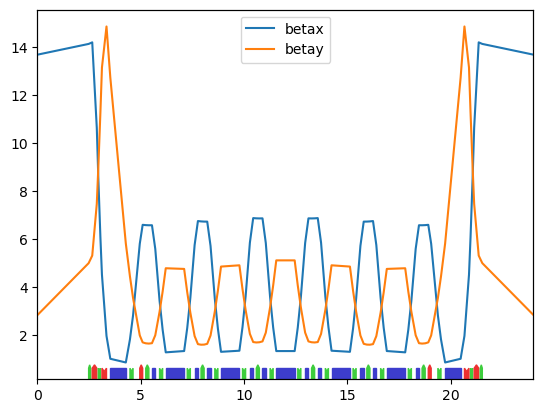

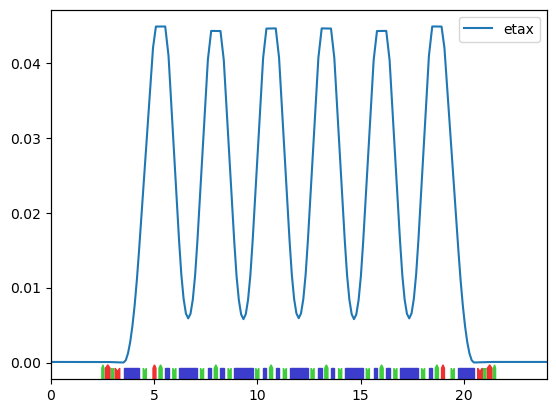

In [2]:
ring.linear_optics()
print(ring)
ssr.plot_lattice(ring.elements, ['betax', 'betay'])
ele_slices = ring.slice_elements(0.1, 0.1, 0.1, 0.1)  # slice elements to obtain smooth curves.
ssr.plot_lattice(ele_slices, 'etax')

## compute driving terms.

The method `DrivingTerms.fluctuation_components()` can calculate the components of RDT fluctuations.

Then can calculate the multi-periods RDTs.

This is how the calculation is performed in function `DrivingTerms.set_periods()` 

In [3]:
rdts = ring.driving_terms()
rdts.set_periods(n_periods=1)
print(rdts)
print(f"dQxx: {-4 * rdts['h22000'] / np.pi:.2f}, dQxy: {-2 * rdts['h11110'] / np.pi:.2f}, dQyy: {-4 * rdts['h00220'] / np.pi:.2f}")
adts = ring.adts(n_periods=1)  # this function is closer to the OPA result.

driving terms: 14 periods
    h21000 : 8.68
    h30000 : 0.73
    h10110 : 29.66
    h10020 : 27.24
    h10200 : 3.22
    h20001 : 3.89
    h00201 : 2.35
    h10002 : 0.02
    h22000 : 44724.01
    h11110 : 33770.06
    h00220 : 152162.04
    h31000 : 7185.06
    h40000 : 474.43
    h20110 : 544.55
    h11200 : 2840.73
    h20020 : 1402.01
    h20200 : 193.49
    h00310 : 976.03
    h00400 : 696.46

driving terms: 1 periods
    h21000 : 3.09
    h30000 : 1.78
    h10110 : 10.55
    h10020 : 22.83
    h10200 : 9.78
    h20001 : 2.25
    h00201 : 2.11
    h10002 : 0.01
    h22000 : 3086.03
    h11110 : 561.04
    h00220 : 11048.68
    h31000 : 4249.69
    h40000 : 672.37
    h20110 : 981.85
    h11200 : 1452.86
    h20020 : 413.76
    h20200 : 248.00
    h00310 : 886.34
    h00400 : 727.92

dQxx: -3929.25-0.00j, dQxy: -357.17+0.00j, dQyy: -14067.61+0.00j
ADTS terms, 1 periods:
    dQxx   : -4081.13
    dQxy   : -1595.48
    dQyy   : -13844.23


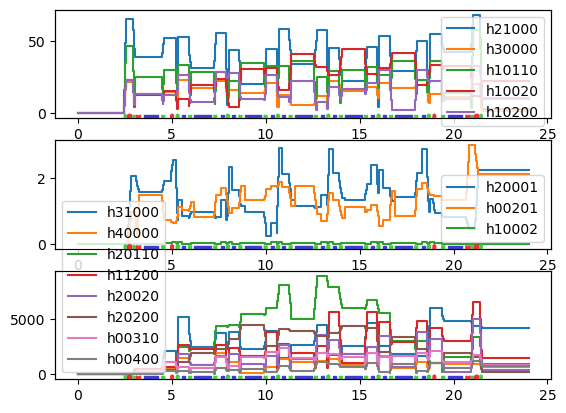

In [4]:
rdts_plot = ring.driving_terms_plot_data()
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax11 = ax1.twinx()
ax22 = ax2.twinx()
ax33 = ax3.twinx()
ssr.plot_layout_in_ax(ring.elements, ax11)
ssr.plot_layout_in_ax(ring.elements, ax22)
ssr.plot_layout_in_ax(ring.elements, ax33)
for k in ['h21000', 'h30000', 'h10110', 'h10020', 'h10200']:
    ax1.plot(rdts_plot['s'], rdts_plot[k], label=k)
ax1.legend()
for k in ['h20001', 'h00201', 'h10002']:
    ax2.plot(rdts_plot['s'], rdts_plot[k], label=k)
ax2.legend()
for k in ['h31000', 'h40000', 'h20110', 'h11200', 'h20020', 'h20200', 'h00310', 'h00400']:
    ax3.plot(rdts_plot['s'], rdts_plot[k], label=k)
ax3.legend()
plt.show()

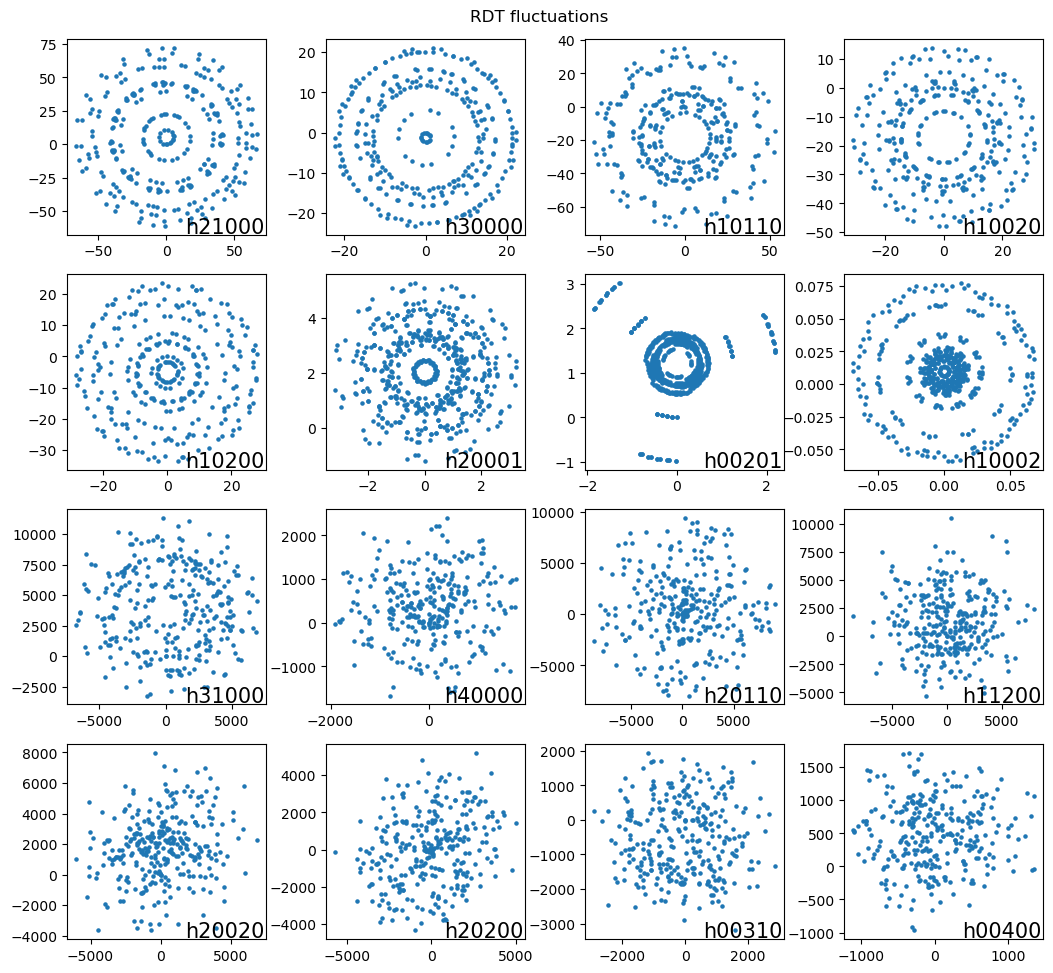

In [5]:
rdts_fluct = rdts.fluctuation(n_periods=14)
fig = plt.figure(figsize=(10.5, 10))
plt.subplots_adjust(left=0.05, right=0.98, bottom=0.05, top=0.95, wspace=0.3)
for i, k in enumerate(['h21000', 'h30000', 'h10110', 'h10020', 'h10200', 'h20001', 'h00201', 'h10002',
                       'h31000', 'h40000', 'h20110', 'h11200', 'h20020', 'h20200', 'h00310', 'h00400']):
    plt.subplot(4, 4, i + 1)
    plt.scatter(np.real(rdts_fluct[k]), np.imag(rdts_fluct[k]), s=5)
    plt.text(0.99, 0.01, k, transform=plt.gca().transAxes, size=15, horizontalalignment="right")
plt.suptitle('RDT fluctuations')
plt.show()

Calculate the higher order chromaticities with the tunes of 4-d off-momentum closed orbit.
   
   delta: the momentum deviation.
   
   matrix_precision: the small deviation to calculate transfer matrix by tracking.
   
   resdl_limit: the limit to judge if the orbit is closed.

try to reset the value of delta, precision and resdl_limit if the result is wrong.

you can call `track_4d_closed_orbit()` function to see the magnitude of the closed orbit, and the matrix_precision should be much smaller than it.

In [6]:
ring.higher_order_chromaticity()

xi2x: -13.57, xi2y: 36.57, xi3x: -1432.42, xi3y: -467.66


{'xi2x': -13.570662755646445,
 'xi2y': 36.5650393228667,
 'xi3x': -1432.4218479873825,
 'xi3y': -467.6583718425201}

Here are some functions.

`ssr.chromaticity_correction()`, `ssr.output_opa_file()` ......

In [7]:
# can not set the limit of sextupole strengths.
ssr.chromaticity_correction(ring, sextupole_name_list=['SD1', 'SF1'], target=[3, 3])
ring.linear_optics()
print(ring)

result is
[-13190.086922354412, 7052.7781261586715]

Length =      336.000 m
angle =       360.000
abs_angle =   439.149
nux =         43.2994
nuy =         16.2985
I1 =        3.02603e-02
I2 =        6.30964e-01
I3 =        5.55012e-02
I4 =        -5.33537e-01
I5 =        1.12209e-05
energy =     2.20e+03 MeV
U0 =           208.10 keV
sigma_e =   7.358e-04
emittance = 6.847e-11 m*rad
Jx =           1.8456
Js =           1.1544
Tperiod =   1.121e-06 sec
alpha =     9.006e-05
eta_p =     9.001e-05
tau_e =         20.53 msec
tau_x =         12.84 msec
tau_y =         23.70 msec
natural_xi_x =   -107.72
natural_xi_y =    -47.69
xi_x =           3.00
xi_y =           3.00


Use `help()` to obtain more information. 

Some other features are still to be improved.